## CMPINF 2100 Week 12 | Measuring CLASSIFICATION PERFORMACE - Confusion Matrix

### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data 

Read the data from LAST week

In [3]:
df = pd.read_csv('../week_11/week_11_intro_binary_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


### Fit the model

In [6]:
fit_glm = smf.logit( formula = 'y ~ x', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


### Predict the training set

In [7]:
df_copy = df.copy()

In [8]:
df_copy['pred_probability'] = fit_glm.predict( df )

In [9]:
df_copy.head()

,x,y,pred_probability
0,-0.457429,1,0.270709
1,0.425948,1,0.513678
2,-0.784695,0,0.201258
3,-1.925209,0,0.061306
4,2.252617,1,0.901780


### Classify the training set

In [10]:
df_copy['pred_class'] = np.where( df_copy.pred_probability > 0.5, 1, 0 )

### Accuracy

The accuracy is the PROPORTION of CORRECT CLASSIFICATIONS!

In [11]:
np.mean( df_copy.y == df_copy.pred_class )

0.6782608695652174

But... ACCURACY does NOT tell us HOW the model was right... ACCURACY does NOT tell us HOW the model was wrong!

Many times we need MORE INFORMATION or DETAILS about **HOW** the classifications were RIGHT or WRONG!

We need to examine the ERRORS!

The ERRORS in a BINARY CLASSIFICATION problem are typically organized in a graphical tool known as the **CONFUSION MATRIX**

### Confusion Matrix

The CONFUSION MATRIX has a special and magic sounding name, but we already know how to calculate the CONFUSION MATIRX because it is nothing more than the COUNTS for the **COMBINATIONS** of 2 categorical variables!

In [12]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

In [13]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

We leanred about DODGED BAR CHARTS and HEAT MAPS for visualizing the COMBINATION between CATEGORICAL VARIABLES!

The CONFUSION MATRIX is a HEAT MAP between the OBSERVED OUTPUT CLASS and the PREDICTED CLASS!

We need to first CROSS-TABULATE the observed output with the predicted class

In [14]:
pd.crosstab( df_copy.y, df_copy.pred_class )

pred_class,0,1
y,,
0,51,16
1,21,27


Let's visualize the CONFUSION MATRIC as a seaborn heatmap!

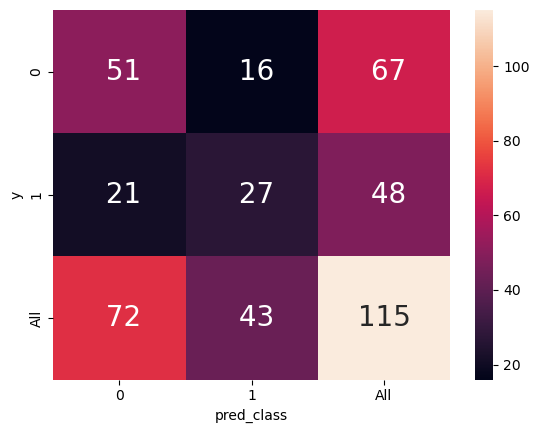

In [19]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True, annot_kws={'size': 20}, fmt='3d' )

plt.show()

In [21]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

In [23]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

We will use the EVENT and NON-EVENT instead of the POSITIVE and NEGATIVE terms because POSITIVE sounds "good". We often work in problems where the EVENT I want to classify is a BAD THING such as FAILURE.

But SKLEARN has a function that calculates the TRUE POSITIVE, TRUE NEGATIVE, FALSE POSITIVE, and FALSE NEGATIVE counts for us.|

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class.to_numpy() )

array([[51, 16],
       [21, 27]], dtype=int64)

In [26]:
confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class.to_numpy() ).ravel()

array([51, 16, 21, 27], dtype=int64)

With that said, there is a useful reason to use the SKLEARN function. This useful reason requires specifying or NAMING the OUTPUT.

In [29]:
TN, FP, FN, TP = confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class.to_numpy() ).ravel()

In [30]:
TN

51

We can calculate ACCURACY using the CONFUSION MATRIX!

In [31]:
( TN + TP ) / (TN + FP + FN + TP)

0.6782608695652174

We can convert the CONFUSION MATRIX counts to PROPORTIONS as well!

These PROPORTIONS CHANGE the question about what we ACCURATE relative to!

So, ACCURACY does NOT care HOW the model is accurate.

What if we wanted to know the accuracy WHEN the EVEN is observed?!

In [32]:
FN + TP

48

In [33]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

The TRUE POSITIVE RATE (TPR) or **Sensitivity** is the PROPORTION of times the MODEL correctly classifies the EVENT **WHEN** the EVENT is OBSERVED!

In [34]:
TP / (TP + FN)

0.5625

Likewise we can focus on the NON-EVENT situation. The TRUE NEGATIVE RATE or **Specificity** is the PROPORTION of times the MODEL CORRECTLY classifies the NON-EVENT **WHEN** the EVENT does NOT occur!

In [35]:
TN / (TN + FP)

0.7611940298507462

In [36]:
TN + FP

67

Sensitivity and Specificity let you know which CLASS, EVENT or NON-EVENT, the MODEL is BETTER at predicting! (In our case, we can see that the model classifies the NON-EVENT better than that of the EVENT).

A related statistic to the Specificity is the **FALSE POSITIVE RATE or FPR**. The FPR is 1 minus the Specificity. 

In [37]:
1 - (TN / (TN + FP) )

0.23880597014925375

### Summary

The CONFUSION MATRIX provides the COUNTS for the COMBINATIONS of the observed output and the model predicted CLASS.

The CONFUSION MATIX has 4 cells in a BINARY CLASSIFICATION problem because there are 4 combinations!

Those cells have important meanings:

- True Positve (TP): classify the EVENT and observe the EVENT - correct classification
- True Negative(TN): classify the NON-EVENT and observe the NON-EVENT - correct classification
- False Positive (FP): classify the EVENT and observe the NON-EVENT - incorrect classification
- False Negative (FN): classify the NON-EVENT and observe the EVENT - incorrect classification

Accuracy is the PROPORTION of correct classifications:

(TN + TP) / (TN + TP + FN + FP)

Sensitivity or the TRUE POSITIVE RATE is the PROPORTION of correct classification when the EVENT is observed:

TP / (TP + FN)

Specificity or the TRUE NEGATIVE RATE is the PROPORTION of correct classifications when the EVENT is NOT observed: 

TN / (TN + FP)

The FALSE POSITIVE RATE is the PROPORTION of INCORRECT classifications when the EVENT is NOT observed:

1 - Specificity